In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X = 2* np.random.rand(100,1)
y = 4 + 3*X+np.random.randn(100,1)

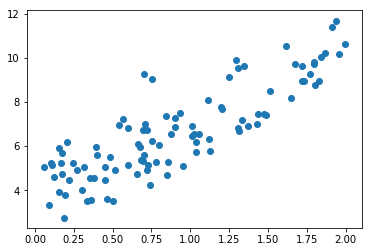

In [11]:
plt.scatter(X,y)
plt.show()

In [14]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_best

array([[ 3.8123012 ],
       [ 3.14167117]])

In [16]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot (theta_best)
y_predict

array([[  3.8123012 ],
       [ 10.09564354]])

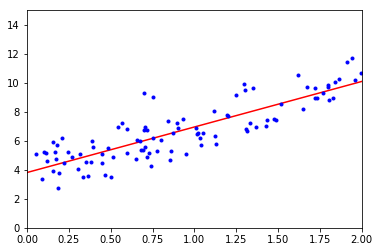

In [18]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

## gradiente descent 

In [19]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization

In [20]:
for iteration in range (n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y) # derivada da função loss em relação a w(theta)
    theta = theta - eta*gradients # update de w (theta)

In [22]:
print('theta encontrado por gradient descent:',theta)
print('theta encontrado por regressão linear:', theta_best)

theta encontrado por gradient descent: [[ 3.8123012 ]
 [ 3.14167117]]
theta encontrado por regressão linear: [[ 3.8123012 ]
 [ 3.14167117]]


## Gradient descent SKLEARN

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\Tales\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([ 3.80989733]), array([ 3.15256763]))

## Decision boundaries

In [26]:
from sklearn import datasets

In [27]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [29]:
X = iris['data'][:,3:] # petal width
y = (iris['target']==2).astype(np.int) #1 iris-virginica, else 0

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

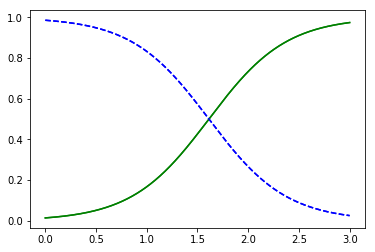

In [35]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-", label='Iris-virginica')
plt.plot (X_new, y_proba[:,0], 'b--', label = 'not iris-virginica')
plt.show()